# changing the event-selection cut that is based on PMT information from our closest-flash to Marco' matched-flash
We suggest to replace the PMT-based cut from the our nominal flash matching,
			to the common flash-matching developed by the CC-inclusive group.
		The reason is better performance of the latter,
		and the desire to publish this work as a part of the cosmic rejection tools developed by MicroBooNE

In [1]:
import sys; 
sys.path.insert(0, '../');sys.path.insert(0, '../../');
sys.path.insert(0,'../analysis_notes/mupClassification/'); sys.path.insert(0,'../analysis_notes/on_off_beam/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
pd.set_option('precision', 2)
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8_v9',
    'date': '2018_04_28'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.480008207788 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_PMT_Cut/Figures/'

In [3]:
versions['date'] = "2018_05_07"
versions['Overlay'] = "prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2"

In [4]:
OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['date'],filename=versions['Overlay']+'_'+versions['date']+'_vertices')
print_and_say("%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay')

101046 pairs from MC-BNB + cosmic DATA overlay
66744 pairs in FV
18025 are 1mu-1p, 27.0%
15339 are other pairs, 23.0%
33380 are cosmic, 50.0%
--------------------------------------------------------------
8617 are CC 1p 0pi, 12.9%
33380 cosmic pairs and 18025 mu-p pairs in overlay


In [5]:
pairtypes  = ['cosmic' ,'CC 1p 0pi'    ]
labels     = ['Cosmic (data)' ,'CC1p0$\\pi$ (MC)']
colors     = ['red'    ,'blue'         ]
cmaps      = ['Reds'   ,'Blues'        ]
fmts       = ['o'      ,'s']

# Applying a cut on the matched-flash

In [6]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order  = ['no cut','Chi2Proton'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,27.0%,100.0%,12.9%,no cut,100.0% (18025),100.0% (15339),100.0% (33380),100.0% (8617)
Chi2Proton,46.0%,71.5%,51.0%,37.9%,Chi2Proton,46.0% (8295),14.6% (2242),3.2% (1062),51.0% (4398)


## for comparison, we first consider the closest-flash and look at the distribution of $N_{PE}$ and the distance to that closest flash

In [7]:
opt = dict(color='black', 
            arrowstyle = 'simple,head_width=.75,head_length=.75',
            connectionstyle = 'arc3,rad=0')

saved/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_PMT_Cut/Figures/ClosestFlash_cut.pdf


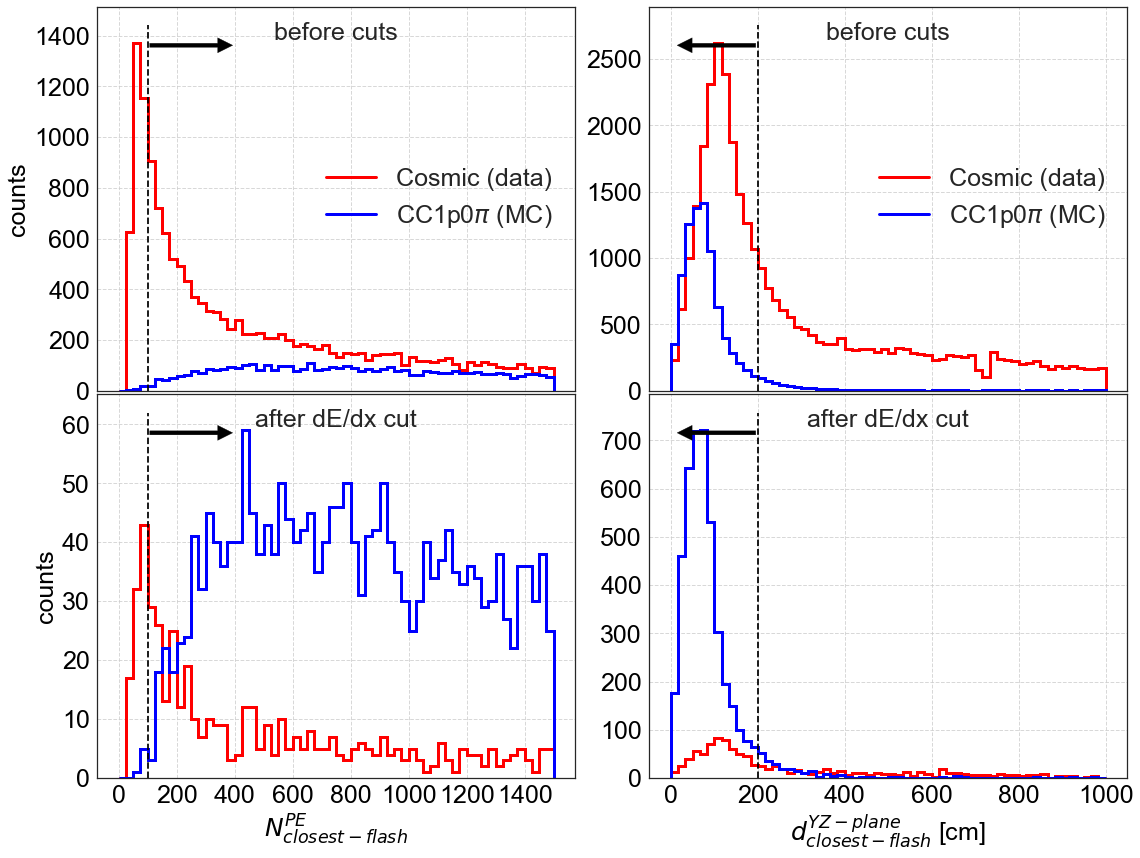

In [8]:
fig = plt.figure(figsize=(16,12))
minPEcut,maxdYZcut = 100, 200
for icut,(cut_name,cut_label) in enumerate(zip(['no cut','Chi2Proton']
                                               ,['before cuts','after dE/dx cut'])):
    for ivar,(var,xlabel,bins,xcut,xcut_arrow) in enumerate(zip(['ClosestFlash_TotalPE','ClosestFlash_YZdistance']
                                                     ,[r'$N_{closest-flash}^{PE}$',r'$d_{closest-flash}^{YZ-plane}$ [cm]']
                                                     ,[linspace(0,1500,61),linspace(0,1000,61)]
                                                     ,[minPEcut,maxdYZcut]
                                                                ,[400,10])):
        ax = fig.add_subplot(2,2,2*icut + ivar+1)
        for isam,(pair_type,slabel,cmap,scolor) in enumerate(zip(pairtypes,labels,cmaps,colors)):
            sam = reducedOverlay[cut_name][pair_type]
            plt.hist(sam[var],histtype='step',color=scolor,linewidth=3,bins=bins)
            plt.plot([0,0],[0,0],color=scolor,linewidth=3,label=slabel)
        ax.set_title(cut_label,y=0.9,fontsize=25)
        set_axes(ax,xlabel if icut>0 else ''
                 ,'counts' if ivar==0 else ''
                 ,remove_ticks_x=True if icut==0 else False
                 ,do_add_grid=True
                 ,do_add_legend=True if icut==0 else False
                 ,legend_loc='center right')
        plt.plot([xcut,xcut],ax.get_ylim(),'--',color='black')
        gca().annotate('',xy=(xcut_arrow, 0.9*np.max(ax.get_ylim()))
                       , xycoords='data',xytext =(xcut, 0.9*np.max(ax.get_ylim()))
                       ,textcoords = 'data',arrowprops=opt,size=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0.01)
filename = figures_path+'ClosestFlash_cut.pdf'
plt.savefig(filename)
print 'saved'+filename

## then we consider the matched-flash and look at the distribution of $N_{PE}$ and the distance to that closest flash, as well as the matching score

saved/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_PMT_Cut/Figures/MatchedFlash_cut.pdf


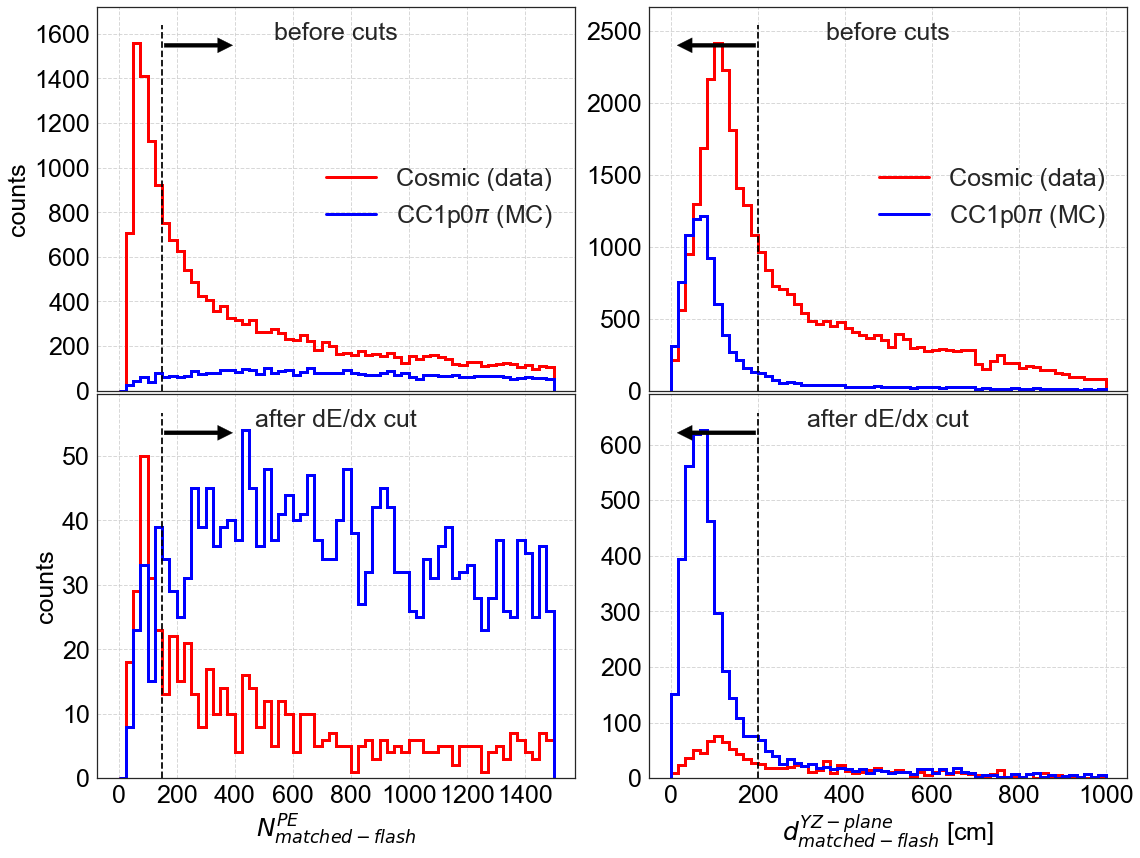

In [9]:
fig = plt.figure(figsize=(16,12))
minPEcut,maxdYZcut,minScoreCut = 150, 200,0
for icut,(cut_name,cut_label) in enumerate(zip(['no cut','Chi2Proton']
                                               ,['before cuts','after dE/dx cut'])):
    for ivar,(var,xlabel,bins,xcut,xcut_arrow) in enumerate(zip(['MatchedFlash_TotalPE','MatchedFlash_YZdistance']
                                                     ,[r'$N_{matched-flash}^{PE}$',r'$d_{matched-flash}^{YZ-plane}$ [cm]']
                                                     ,[linspace(0,1500,61),linspace(0,1000,61)]
                                                     ,[minPEcut,maxdYZcut]
                                                                ,[400,10])):
        ax = fig.add_subplot(2,2,2*icut + ivar+1)
        for isam,(pair_type,slabel,cmap,scolor) in enumerate(zip(pairtypes,labels,cmaps,colors)):
            sam = reducedOverlay[cut_name][pair_type]
            plt.hist(sam[var],histtype='step',color=scolor,linewidth=3,bins=bins)
            plt.plot([0,0],[0,0],color=scolor,linewidth=3,label=slabel)
        ax.set_title(cut_label,y=0.9,fontsize=25)
        set_axes(ax,xlabel if icut>0 else ''
                 ,'counts' if ivar==0 else ''
                 ,remove_ticks_x=True if icut==0 else False
                 ,do_add_grid=True
                 ,do_add_legend=True if icut==0 else False
                 ,legend_loc='center right')
        plt.plot([xcut,xcut],ax.get_ylim(),'--',color='black')
        gca().annotate('',xy=(xcut_arrow, 0.9*np.max(ax.get_ylim()))
                       , xycoords='data',xytext =(xcut, 0.9*np.max(ax.get_ylim()))
                       ,textcoords = 'data',arrowprops=opt,size=20)
plt.tight_layout()
fig.subplots_adjust(hspace=0.01)
filename = figures_path+'MatchedFlash_cut.pdf'
plt.savefig(filename)
print 'saved'+filename

## The impact of replacing the PMT-based cut

In [10]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order  = ['no cut','Chi2Proton','ClosestFlash','length','vertex activity','delta phi','soft Pt'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,27.0%,100.0%,12.9%,no cut,100.0% (18025),100.0% (15339),100.0% (33380),100.0% (8617)
Chi2Proton,46.0%,71.5%,51.0%,37.9%,Chi2Proton,46.0% (8295),14.6% (2242),3.2% (1062),51.0% (4398)
ClosestFlash,43.6%,74.6%,48.0%,39.3%,ClosestFlash,43.6% (7850),14.2% (2174),1.5% (501),48.0% (4134)
length,40.1%,81.0%,44.9%,43.4%,length,40.1% (7221),8.5% (1302),1.2% (388),44.9% (3868)
vertex activity,27.3%,82.0%,38.9%,55.9%,vertex activity,27.3% (4924),5.7% (877),0.6% (206),38.9% (3355)
delta phi,18.2%,91.3%,29.6%,71.1%,delta phi,18.2% (3280),1.2% (190),0.4% (124),29.6% (2554)
soft Pt,15.8%,94.1%,26.5%,75.7%,soft Pt,15.8% (2841),0.8% (124),0.2% (55),26.5% (2287)


In [11]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (33380) & 100.0% (8617) & 12.9%\tabularnewline
\hline
Chi2Proton & 3.2% (1062) & 51.0% (4398) & 37.9%\tabularnewline
\hline
ClosestFlash & 1.5% (501) & 48.0% (4134) & 39.3%\tabularnewline
\hline
length & 1.2% (388) & 44.9% (3868) & 43.4%\tabularnewline
\hline
vertex activity & 0.6% (206) & 38.9% (3355) & 55.9%\tabularnewline
\hline
delta phi & 0.4% (124) & 29.6% (2554) & 71.1%\tabularnewline
\hline
soft Pt & 0.2% (55) & 26.5% (2287) & 75.7%\tabularnewline
\hline


In [12]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,minPEcut = 150
                                                                   ,cuts_order  = ['no cut','Chi2Proton','MatchedFlash','length','vertex activity','delta phi','soft Pt'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,27.0%,100.0%,12.9%,no cut,100.0% (18025),100.0% (15339),100.0% (33380),100.0% (8617)
Chi2Proton,46.0%,71.5%,51.0%,37.9%,Chi2Proton,46.0% (8295),14.6% (2242),3.2% (1062),51.0% (4398)
MatchedFlash,38.0%,78.5%,42.2%,41.6%,MatchedFlash,38.0% (6845),10.0% (1529),1.0% (350),42.2% (3633)
length,35.0%,84.2%,39.6%,45.5%,length,35.0% (6316),5.9% (912),0.8% (275),39.6% (3411)
vertex activity,23.9%,85.1%,34.4%,58.6%,vertex activity,23.9% (4301),4.0% (606),0.4% (145),34.4% (2962)
delta phi,15.8%,92.7%,26.2%,73.4%,delta phi,15.8% (2850),0.9% (143),0.2% (81),26.2% (2257)
soft Pt,13.7%,94.9%,23.4%,77.8%,soft Pt,13.7% (2463),0.6% (90),0.1% (42),23.4% (2019)


In [13]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (33380) & 100.0% (8617) & 12.9%\tabularnewline
\hline
Chi2Proton & 3.2% (1062) & 51.0% (4398) & 37.9%\tabularnewline
\hline
MatchedFlash & 1.0% (350) & 42.2% (3633) & 41.6%\tabularnewline
\hline
length & 0.8% (275) & 39.6% (3411) & 45.5%\tabularnewline
\hline
vertex activity & 0.4% (145) & 34.4% (2962) & 58.6%\tabularnewline
\hline
delta phi & 0.2% (81) & 26.2% (2257) & 73.4%\tabularnewline
\hline
soft Pt & 0.1% (42) & 23.4% (2019) & 77.8%\tabularnewline
\hline
